In [49]:
# 키프레임 추출한 csv 파일 추출(fall)

import pandas as pd
url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_fall_con.csv"
df1 = pd.read_csv(url)

print(df1.head())

  class video_folder           frame  keypoint_index         x         y  \
0  Fall      fall_01  frame_0000.jpg               0  0.446386  0.357385   
1  Fall      fall_01  frame_0000.jpg               1  0.454791  0.350321   
2  Fall      fall_01  frame_0000.jpg               2  0.437988  0.350087   
3  Fall      fall_01  frame_0000.jpg               3  0.461094  0.347411   
4  Fall      fall_01  frame_0000.jpg               4  0.424107  0.350340   

   confidence  
0    0.596156  
1    0.595182  
2    0.523923  
3    0.637590  
4    0.589970  


In [50]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(fall)
import numpy as np

all_sequences = []
all_labels = []

for i in range(1, 31):
    video_id = f"fall_{i:02d}"  # fall_01, fall_02, ..., fall_30
    df_video = df1[(df1["video_folder"] == video_id) & (df1["class"] == "Fall")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences.append(sequence)
    all_labels.append(2) # 낙상 클래스2

print(f"총 시퀀스 개수: {len(all_sequences)}")
print(f"첫 시퀀스 shape: {all_sequences[0].shape}")



총 시퀀스 개수: 30
첫 시퀀스 shape: (259, 34)


In [51]:
# 키프레임 추출한 csv 파일 추출(suspicious)

url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_suspicious_con.csv"
df2 = pd.read_csv(url)

print(df2.head())

        class video_folder           frame  keypoint_index         x  \
0  Suspicious       sus_01  frame_0000.jpg               0  0.409221   
1  Suspicious       sus_01  frame_0000.jpg               1  0.406523   
2  Suspicious       sus_01  frame_0000.jpg               2  0.415394   
3  Suspicious       sus_01  frame_0000.jpg               3  0.393519   
4  Suspicious       sus_01  frame_0000.jpg               4  0.415428   

          y  confidence  
0  0.345961    0.159283  
1  0.336220    0.075232  
2  0.335941    0.130593  
3  0.328424    0.122683  
4  0.330966    0.161106  


In [52]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(suspicious)

all_sequences1 = []
all_labels1 = []

for i in range(1, 22):
    video_id = f"sus_{i:02d}"
    df_video = df2[(df2["video_folder"] == video_id) & (df2["class"] == "Suspicious")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences1.append(sequence)
    all_labels1.append(1) # 위험 클래스 1

print(f"총 시퀀스 개수: {len(all_sequences1)}")
print(f"첫 시퀀스 shape: {all_sequences1[0].shape}")

sus_04 데이터가 없습니다.
총 시퀀스 개수: 20
첫 시퀀스 shape: (252, 34)


In [53]:
url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_normal_con.csv"
df3 = pd.read_csv(url)

print(df3.head())

    class video_folder           frame  keypoint_index         x         y  \
0  Normal    normal_01  frame_0000.jpg               0  0.491582  0.362946   
1  Normal    normal_01  frame_0000.jpg               1  0.499338  0.356676   
2  Normal    normal_01  frame_0000.jpg               2  0.483186  0.354573   
3  Normal    normal_01  frame_0000.jpg               3  0.507564  0.360179   
4  Normal    normal_01  frame_0000.jpg               4  0.473766  0.356689   

   confidence  
0    0.491786  
1    0.523412  
2    0.572754  
3    0.681367  
4    0.676613  


In [54]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(normal)

all_sequences2 = []
all_labels2 = []

for i in range(1, 35):
    video_id = f"normal_{i:02d}"
    df_video = df3[(df3["video_folder"] == video_id) & (df3["class"] == "Normal")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences2.append(sequence)
    all_labels2.append(0) # 정상 클래스 0

print(f"총 시퀀스 개수: {len(all_sequences2)}")
print(f"첫 시퀀스 shape: {all_sequences2[0].shape}")

normal_28 데이터가 없습니다.
총 시퀀스 개수: 33
첫 시퀀스 shape: (271, 34)


In [55]:
print(f"fall 라벨 개수: {len(all_labels)}")
print(f"sus 라벨 개수: {len(all_labels1)}")
print(f"Normal 라벨 개수: {len(all_labels2)}")

fall 라벨 개수: 30
sus 라벨 개수: 20
Normal 라벨 개수: 33


In [56]:
# 입력 시퀀스 길이 패딩

X_all = all_sequences + all_sequences1 + all_sequences2
y_all = all_labels + all_labels1 + all_labels2

print(set(y_all))

{0, 1, 2}


In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

MAX_LEN = 271

X_all_padded = pad_sequences(X_all, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
X_all_padded = np.array(X_all_padded)
y_all = np.array(y_all)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = np.array([
    MinMaxScaler().fit_transform(seq) for seq in X_all_padded
])

In [59]:
# 학습/ 검증용 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all)

In [60]:
# LSTM 기반 모델 구성 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(MAX_LEN, 34)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# 모델 컴파일

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)             │ (None, 271, 34)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 271, 128)       │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 271, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,219 (536.01 KB)

 Trainable params: 137,219 (536.01 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.3929 - loss: 1.1179 - val_accuracy: 0.6471 - val_loss: 1.0628
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.4312 - loss: 1.0834 - val_accuracy: 0.4118 - val_loss: 1.0467
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.4654 - loss: 1.0887 - val_accuracy: 0.5882 - val_loss: 1.0435
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.4727 - loss: 1.0406 - val_accuracy: 0.4118 - val_loss: 1.0791
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.4175 - loss: 1.0929 - val_accuracy: 0.4118 - val_loss: 1.0740
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.4242 - loss: 1.0920 - val_accuracy: 0.5882 - val_loss: 1.0528
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.4863 - loss: 1.0258 - val_accuracy: 0.3529 - val_loss: 1.0587
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.4437 - loss: 1.0639 - val_accuracy: 0.3529 - val_loss:

In [63]:
model.save("fall_detection_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
📊 Classification Report
              precision    recall  f1-score   support

      Normal       0.50      1.00      0.67         7
  Suspicious       0.00      0.00      0.00         4
        Fall       0.67      0.33      0.44         6

    accuracy                           0.53        17
   macro avg       0.39      0.44      0.37        17
weighted avg       0.44      0.53      0.43        17



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


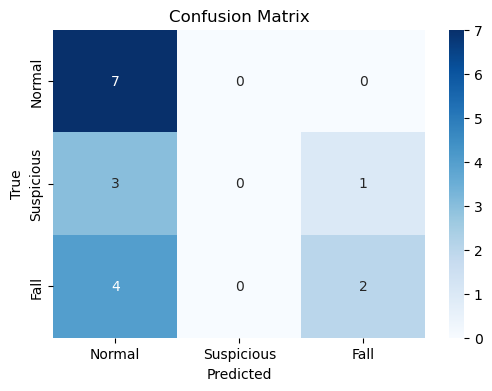

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예측
y_pred = model.predict(X_val)
y_pred_label = np.argmax(y_pred, axis=1)
y_true_label = y_val  

# 평가 결과 출력
print("📊 Classification Report")
print(classification_report(y_true_label, y_pred_label, target_names=['Normal', 'Suspicious', 'Fall']))

# confusion matrix 시각화
cm = confusion_matrix(y_true_label, y_pred_label)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Suspicious', 'Fall'],
            yticklabels=['Normal', 'Suspicious', 'Fall'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## 모델 성능 분석 요약  

- 전체 시퀀스: 83개  
  (Normal 33, Suspicious 20, Fall 30)

- 검증 데이터: test_size=0.2 → 17개 샘플로 평가 진행


---

### 전체 모델 성능

1. Accuracy  |  0.53 (53%)    ->  총 17개 중 약 9개 올바르게 예측 
2. Macro 평균  |  P: 0.39 / R: 0.44 / F1: 0.37  -> 클래스 간 균형 평균. 위험 클래스 영향으로 낮게 나옴 |
3. Weighted 평균  |  P: 0.44 / R: 0.53 / F1: 0.43   -> 샘플 수를 고려한 평균. 정상 클래스 성능에 편향되어 있음

---

### Confusion Matrix 기반 오분류 분석

1. 정상 클래스는 대부분 정확하게 예측됨 (Recall 100%)
2. 위험 클래스는 모두 오분류 (3건은 정상으로, 1건은 낙상으로 오분류) → 위험 클래스를 혼동함
3. 낙상 클래스도 과반수는 정상으로 오분류 → 정상으로 치우친 예측 경향

---

### ⚠️ 클래스별 성능 및 문제점 분석

1. 위험 클래스 미탐지
   - Recall, Precision, F1-Score 모두 0%
   - → 학습 데이터 부족 또는 특징 중첩 가능성

2. 정상 클래스 과예측
   - 다른 클래스들을 정상으로 예측하는 경향 강함
   - → 모델이 정상 클래스에 편향, 다른 클래스는 일반화 실패 가능성 있음 
   - 과적합 경향도 일부 의심됨

3. 낙상 클래스 예측 불안정
   - Recall 0.33, Precision 0.67 -> 정확도는 높지만 재현율이 낮음
   - 정상으로 오분류된 낙상 샘플 다수 존재


---
> ✅ 학습 데이터 수를 보강하거나, 클래스 간 경계를 명확히 하기 위한 추가 전처리 또는 특징 추출이 필요할 수 있음.
